In [43]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
spx = pdr.get_data_yahoo('^GSPC')
nikkei = pdr.get_data_yahoo('^N225')
shcomp = pdr.get_data_yahoo('000001.SS')

In [32]:
shcomp.head(1)
nikkei.head(1)
spx.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1133.869995,1116.560059,1116.560059,1132.98999,3991400000,1132.98999


In [40]:
spx_daily_pct_change = spx.pct_change()
nikkei_daily_pct_change = nikkei.pct_change()
shcomp_daily_pct_change = shcomp.pct_change()

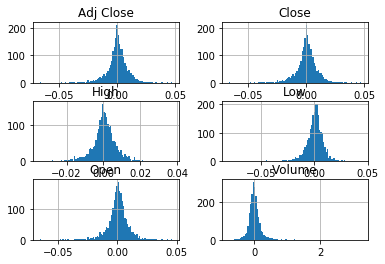

In [44]:
spx_daily_pct_change.hist(bins = 100)
plt.show()

In [46]:
spx_daily_pct_change.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,0.000432,0.000447,0.000450,0.000446,0.017608,0.000446
std,0.006957,0.008697,0.008808,0.009267,0.207437,0.009267
min,-0.034610,-0.079748,-0.065291,-0.066634,-0.761155,-0.066634
25%,-0.002667,-0.003371,-0.003296,-0.003297,-0.081489,-0.003297
50%,0.000423,0.001113,0.000716,0.000546,-0.001709,0.000546
75%,0.003951,0.004893,0.004730,0.004962,0.088687,0.004962
max,0.037215,0.044092,0.046008,0.047407,3.234605,0.047407
